<a href="https://colab.research.google.com/github/KaydeeJR/ML_Sales_Prediction/blob/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MOUNTING GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---





---





# **<u>ACCESSING DRIVE DIRECTORY</u>**

In [3]:
# Change to specific directory in google drive
%cd /content/drive/MyDrive/Datasets/PharmaSalesCSV/
# To list files in directory => !ls
file_path_to_train_set = "train.csv"
file_path_to_test_set="test.csv"
file_path_to_store_dataset = "store.csv"

/content/drive/MyDrive/Datasets/PharmaSalesCSV


#**<u>READING CSV FILES</u>**

In [4]:
import pandas as pd
import warnings
# DtypeWarning for pandas dataframe
warnings.filterwarnings("ignore")
sales_train_dataset = pd.read_csv(file_path_to_train_set)
sales_test_dataset = pd.read_csv(file_path_to_test_set,index_col="Id")
store_dataset = pd.read_csv(file_path_to_store_dataset,index_col="Store")



---



---



#**DESCRIBING DATASET**

In [5]:
sales_train_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
sales_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [192]:
sales_train_dataset.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [8]:
numeric_sales_df = sales_train_dataset[["Sales","Customers"]]
numeric_sales_df.describe()

,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02
std,3.849926e+03,4.644117e+02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,4.050000e+02
50%,5.744000e+03,6.090000e+02
75%,7.856000e+03,8.370000e+02
max,4.155100e+04,7.388000e+03


In [9]:
sales_train_dataset.drop("Store",axis=1).corr()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
DayOfWeek,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


In [10]:
store_dataset.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
store_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   CompetitionDistance        1112 non-null   float64
 3   CompetitionOpenSinceMonth  761 non-null    float64
 4   CompetitionOpenSinceYear   761 non-null    float64
 5   Promo2                     1115 non-null   int64  
 6   Promo2SinceWeek            571 non-null    float64
 7   Promo2SinceYear            571 non-null    float64
 8   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 87.1+ KB


In [12]:
store_dataset.nunique()

StoreType                      4
Assortment                     3
CompetitionDistance          654
CompetitionOpenSinceMonth     12
CompetitionOpenSinceYear      23
Promo2                         2
Promo2SinceWeek               24
Promo2SinceYear                7
PromoInterval                  3
dtype: int64

In [13]:
numeric_stores_df = store_dataset.select_dtypes(include="float64")
numeric_stores_df.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,14.141984,1.674935
min,20.000000,1.000000,1900.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,50.000000,2015.000000


In [14]:
numeric_stores_df.corr()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
CompetitionDistance,1.000000,-0.059126,0.025124,-0.060552,-0.109504
CompetitionOpenSinceMonth,-0.059126,1.000000,-0.052250,-0.035504,0.047815
CompetitionOpenSinceYear,0.025124,-0.052250,1.000000,-0.079984,0.006354
Promo2SinceWeek,-0.060552,-0.035504,-0.079984,1.000000,-0.217650
Promo2SinceYear,-0.109504,0.047815,0.006354,-0.217650,1.000000


In [15]:
sales_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 1 to 41088
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Open           41077 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.5+ MB


In [16]:
sales_test_dataset.nunique()

Store            856
DayOfWeek          7
Date              48
Open               2
Promo              2
StateHoliday       2
SchoolHoliday      2
dtype: int64



---



---





1.   **MISSING VALUES IN DATASET**



In [17]:
sales_train_dataset.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [18]:
sales_test_dataset.isnull().sum()

Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [123]:
store_dataset.isnull().sum()

StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

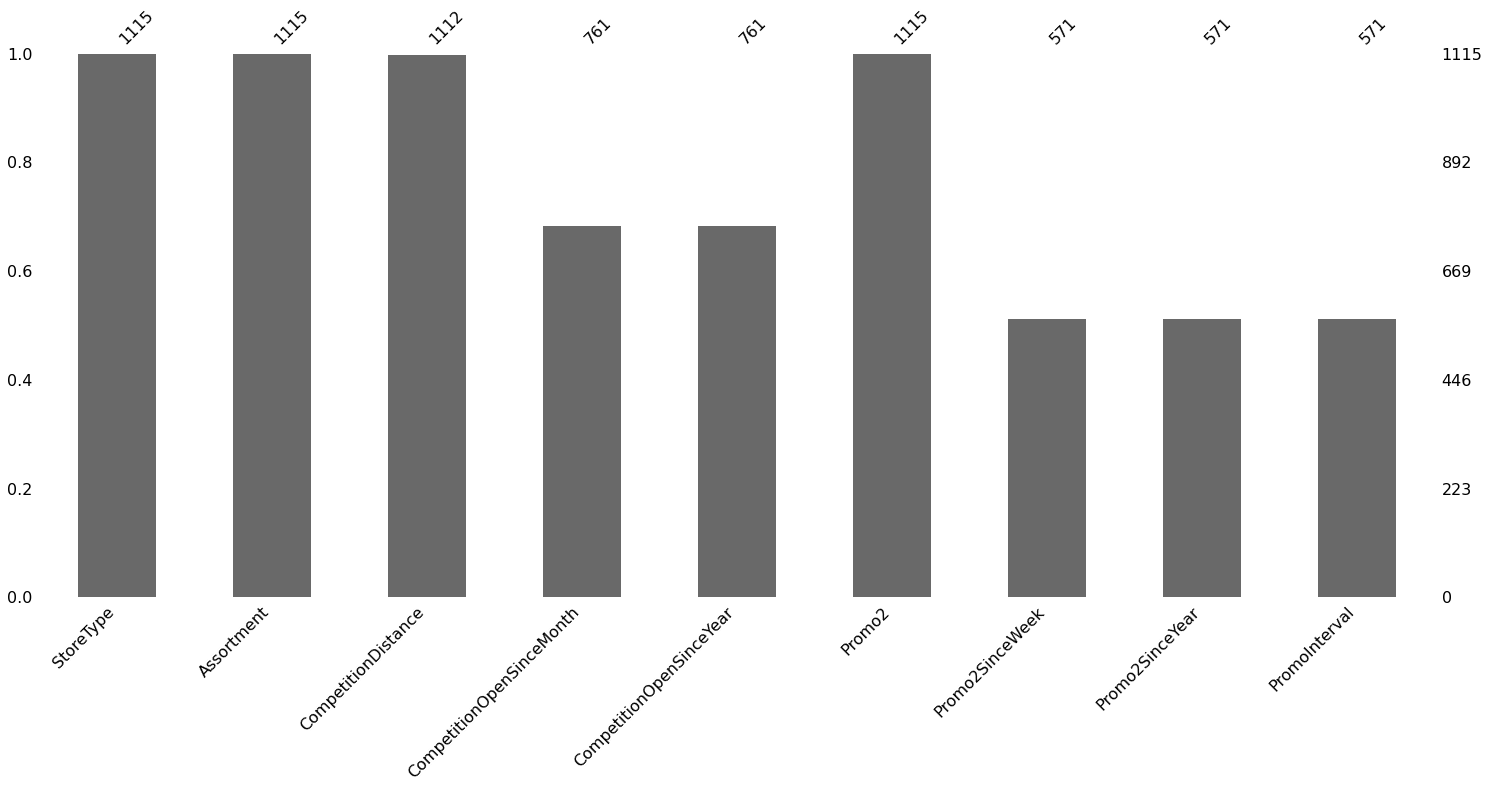

In [125]:
import missingno as msno
msno.bar(store_dataset, labels=list(store_dataset.columns))
plt.show()

2.   **OUTLIERS - VISUALIZED USING BOXPLOT**

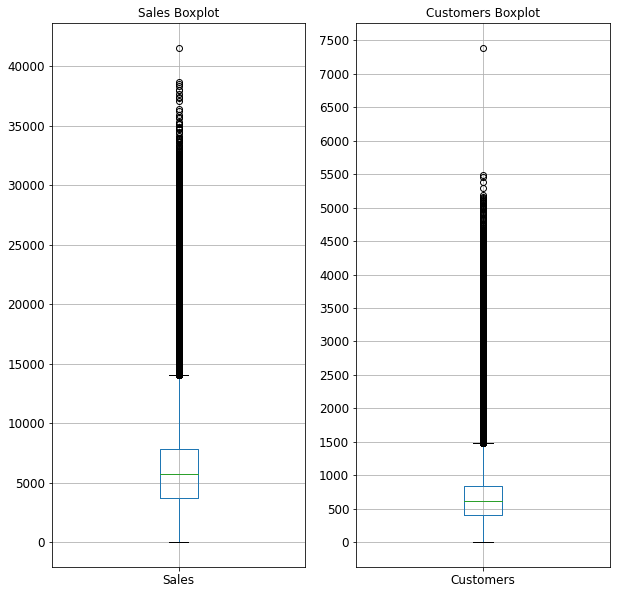

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# create a figure object and set properties
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
# create subplots
#1)
plt.subplot(1, 2, 1)
boxplot_sales = numeric_sales_df.boxplot(column="Sales",fontsize='large',figsize=(10,10),return_type='axes')
boxplot_sales.set_title("Sales Boxplot")
fig.add_subplot(boxplot_sales)
plt.yticks(np.arange(0, 42000,5000))
#2)
plt.subplot(1, 2, 2)
boxplot_customers = numeric_sales_df.boxplot(column="Customers",fontsize='large',figsize=(5,5),return_type='axes')
boxplot_customers.set_title("Customers Boxplot")
fig.add_subplot(boxplot_customers)
plt.yticks(np.arange(0, 8000, 500))
plt.show()

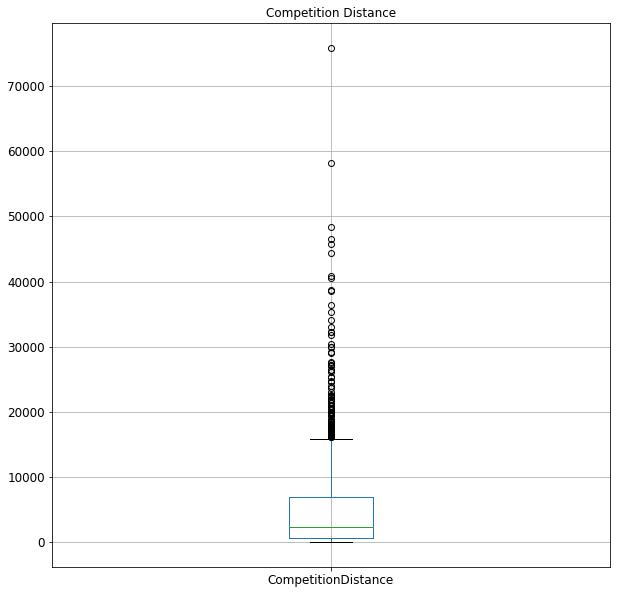

In [21]:
competition_boxplot = numeric_stores_df["CompetitionDistance"].to_frame()
competition_boxplot.boxplot(fontsize='large',figsize=(10,10),return_type='axes').set_title("Competition Distance")
plt.show()

3.   **VISUALIZING CATEGORICAL DATA**

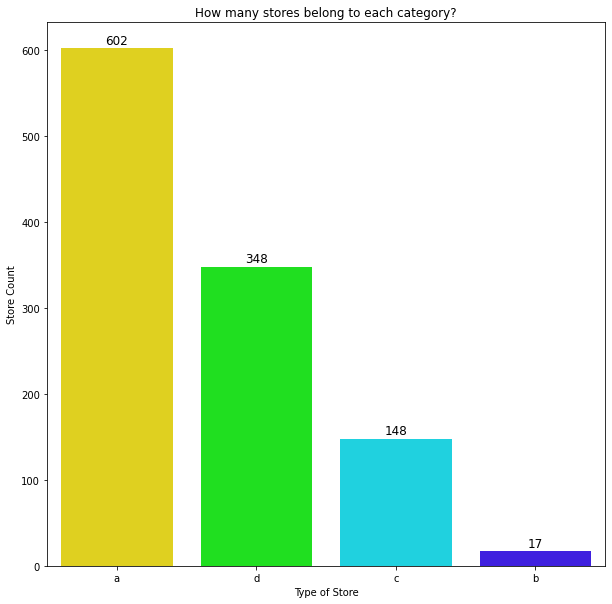

In [22]:
# Store Types - a,b,c,d StoreType
plt.figure(figsize=(10,10))
axis = sns.countplot(x='StoreType',palette="gist_rainbow",data=store_dataset,order=store_dataset["StoreType"].value_counts().index)
axis.set_xlabel('Type of Store')
axis.set_ylabel('Store Count')
axis.set_title('How many stores belong to each category?')
for index in range(len(store_dataset["StoreType"].value_counts().values)):
    # plot text at coordinates
  axis.text(index,store_dataset["StoreType"].value_counts().values[index]+5,
            store_dataset["StoreType"].value_counts().values[index],
            horizontalalignment='center', fontsize=12)
plt.show()

[593 513   9]
Index(['a', 'c', 'b'], dtype='object')


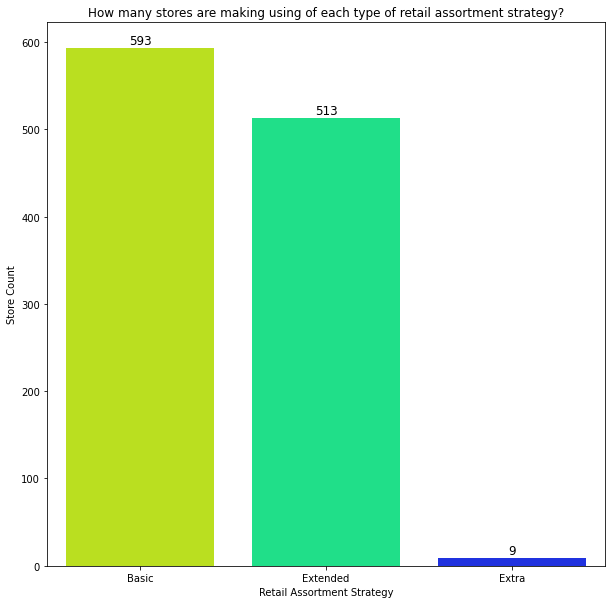

In [23]:
# Retail Assortment strategies:
# a = basic
# b = extra
# c = extended
plt.figure(figsize=(10,10))
x_axis_label =["Basic","Extended","Extra"]
print(store_dataset["Assortment"].value_counts().sort_values(ascending=False).values)
print(store_dataset["Assortment"].value_counts().sort_values(ascending=False).index)
axis = sns.countplot(x='Assortment',palette="gist_rainbow",data=store_dataset,
                     order=store_dataset["Assortment"].value_counts().index)
axis.set_xlabel('Retail Assortment Strategy')
axis.set_ylabel('Store Count')
axis.set_title('How many stores are making using of each type of retail assortment strategy?')
axis.set_xticklabels(x_axis_label)
for index in range(len(store_dataset["Assortment"].value_counts().values)):
    # plot text at coordinates
  axis.text(index,store_dataset["Assortment"].value_counts().values[index]+5,
            store_dataset["Assortment"].value_counts().values[index],
            horizontalalignment='center', fontsize=12)
plt.show()

[544 571]
[0, 1]


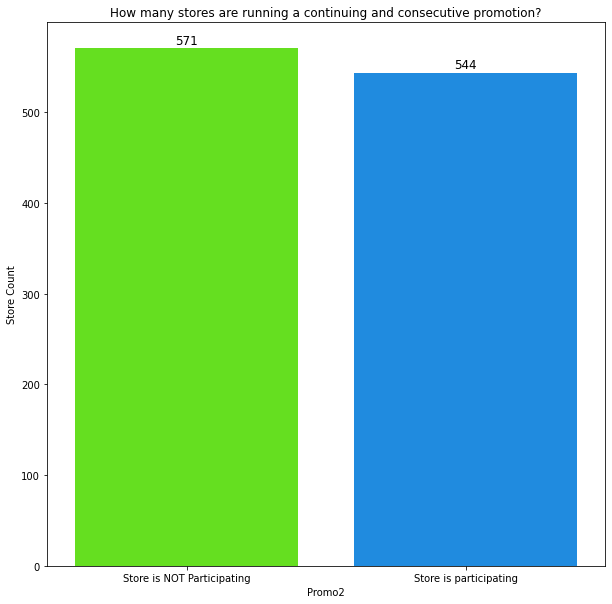

In [24]:
plt.figure(figsize=(10,10))
print(store_dataset["Promo2"].value_counts().sort_values(ascending=True).values)
print(store_dataset["Promo2"].value_counts().sort_values(ascending=True).index.tolist())
axis = sns.countplot(x='Promo2',palette="gist_rainbow",data=store_dataset,
                     order=store_dataset["Promo2"].value_counts().index)
axis.set_xlabel('Promo2')
axis.set_ylabel('Store Count')
axis.set_title('How many stores are running a continuing and consecutive promotion?')
x_axis_label =["Store is NOT Participating","Store is participating"]
axis.set_xticklabels(x_axis_label)
for index in range(len(store_dataset["Promo2"].value_counts().values)):
    # plot text at coordinates
  axis.text(index,store_dataset["Promo2"].value_counts().values[index]+5,
            store_dataset["Promo2"].value_counts().values[index], horizontalalignment='center', fontsize=12)
plt.show()



---



---



# **<u>Task 1 - Exploration of customer purchasing behaviour using sales training dataset</u>**

**Converting Date column to datetime in both datasets**

In [25]:
sales_train_dataset['Date']=pd.to_datetime(sales_train_dataset['Date'])
sales_test_dataset['Date']=pd.to_datetime(sales_test_dataset['Date'])

In [26]:
print(f"The training data was acquried runs from {sales_train_dataset['Date'].min()}"+
      f" to {sales_train_dataset['Date'].max()}")
print(f"The testing data was acquired from {sales_test_dataset['Date'].min()}"+
      f" to {sales_test_dataset['Date'].max()}")

The training data was acquried runs from 2013-01-01 00:00:00 to 2015-07-31 00:00:00
The testing data was acquired from 2015-08-01 00:00:00 to 2015-09-17 00:00:00


**Checking the distribution of features between training data set and test dataset**

Store


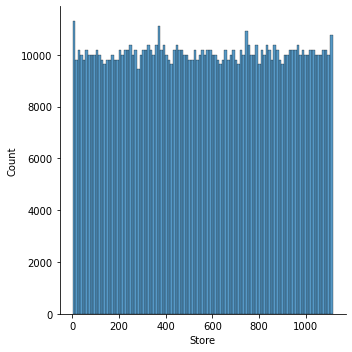

DayOfWeek


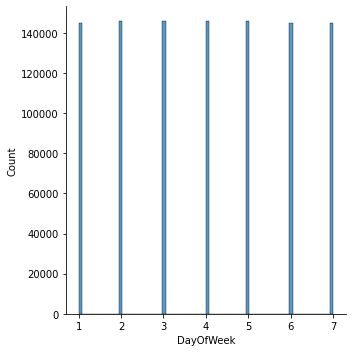

Date


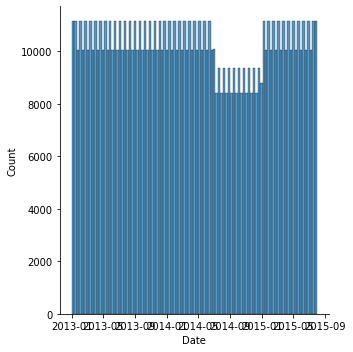

Open


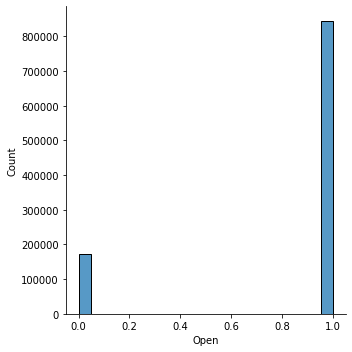

Promo


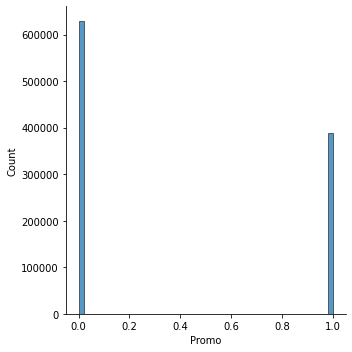

StateHoliday


TypeError: ignored

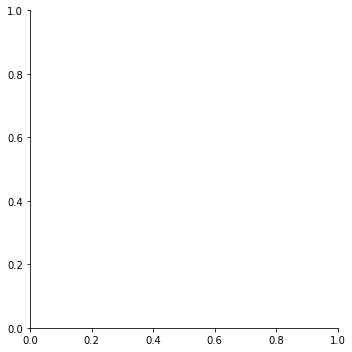

In [27]:
# using features that are common to both datasets
train_features = sales_train_dataset.drop(['Customers','Sales'],axis=1)
# create plots to show distribution of features in training dataset
for col_index in range(len(train_features.columns.tolist())):
    print(train_features.columns.tolist()[col_index])
    sns.displot(train_features,x=list(train_features.columns)[col_index]) # FacetGrid object
    plt.show()

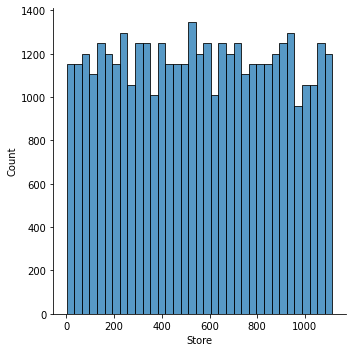

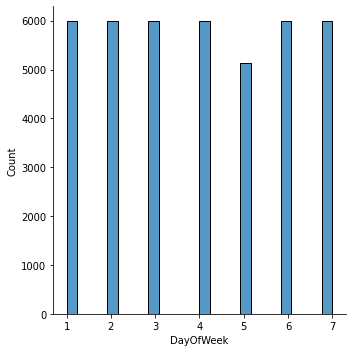

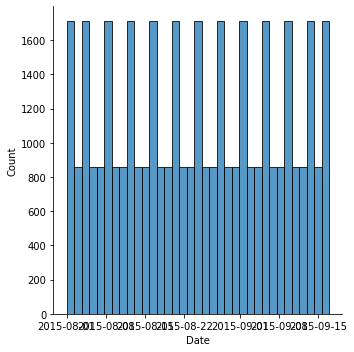

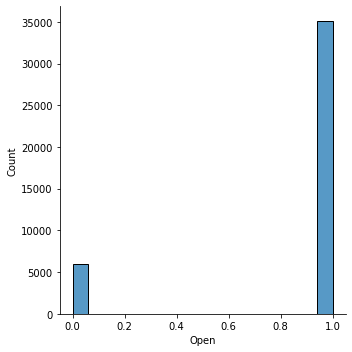

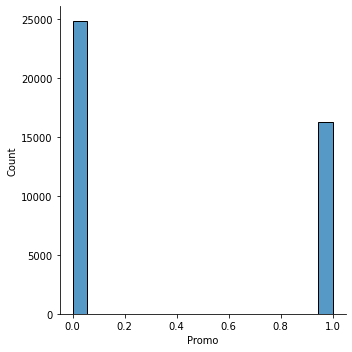

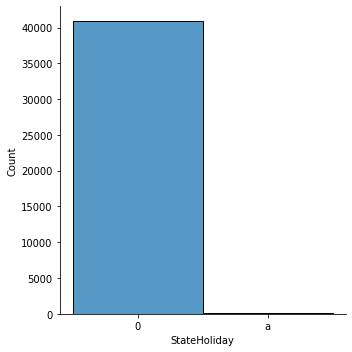

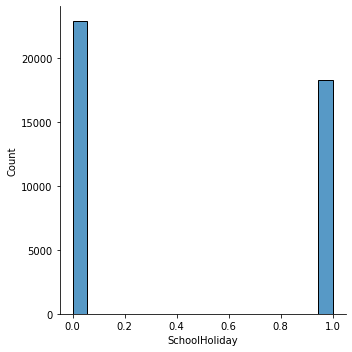

In [28]:
# create plots to show distribution of features in test datasets
for col_index in range(len(sales_test_dataset.columns.tolist())):
    sns.displot(sales_test_dataset,x=sales_test_dataset.columns.tolist()[col_index]) # FacetGrid object
plt.show()

**Sales behaviour before,during and after holidays**

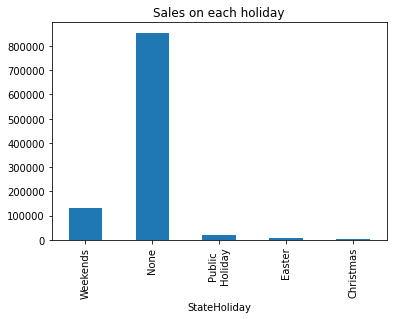

In [29]:
# Schools are closed on Weekends and Holidays.
holiday_list=["Weekends","None","Public\nHoliday","Easter","Christmas"]
holiday_Sales = sales_train_dataset.groupby(['StateHoliday']).count()['Sales'].plot(kind='bar',
                                                                    title="Sales on each holiday")
holiday_Sales.set_xticklabels(holiday_list)
plt.show()

In [34]:
!pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<generator object DataFrame.iterrows at 0x7fa15b2b74d0>


ValueError: ignored

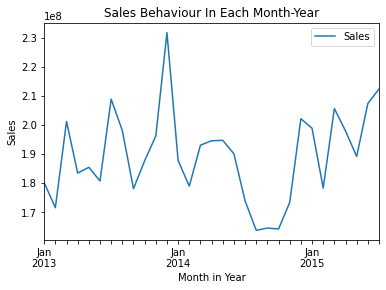

In [107]:
# Total sales in month in a year
# Assuming that the company stores are all in Kenya
import holidays
ke_holidays = holidays.country_holidays('KE')
# a dataframeof date values
dates_df = sales_train_dataset.groupby(sales_train_dataset["Date"].dt.date).sum()
# a dataframe of sales and month-year values
monthly_sales=sales_train_dataset.groupby(sales_train_dataset["Date"].dt.to_period("M"))["Sales"].sum().to_frame()
fig, ann_sales_axes = plt.subplots()
monthly_sales.plot.line(title='Sales Behaviour In Each Month-Year',legend=True, ax=ann_sales_axes)
plt.xlabel("Month in Year")
plt.ylabel("Sales")
plt.xticks(monthly_sales.index)
for k, v in monthly_sales.iterrows():
    print(monthly_sales.iterrows())
#for date_index in range(len(dates_df.index)):
    #if dates_df.index[date_index] in ke_holidays:
        # plot text at coordinates
    ann_sales_axes.annotate("1","Holiday")#(date_index, date_index)
plt.show()

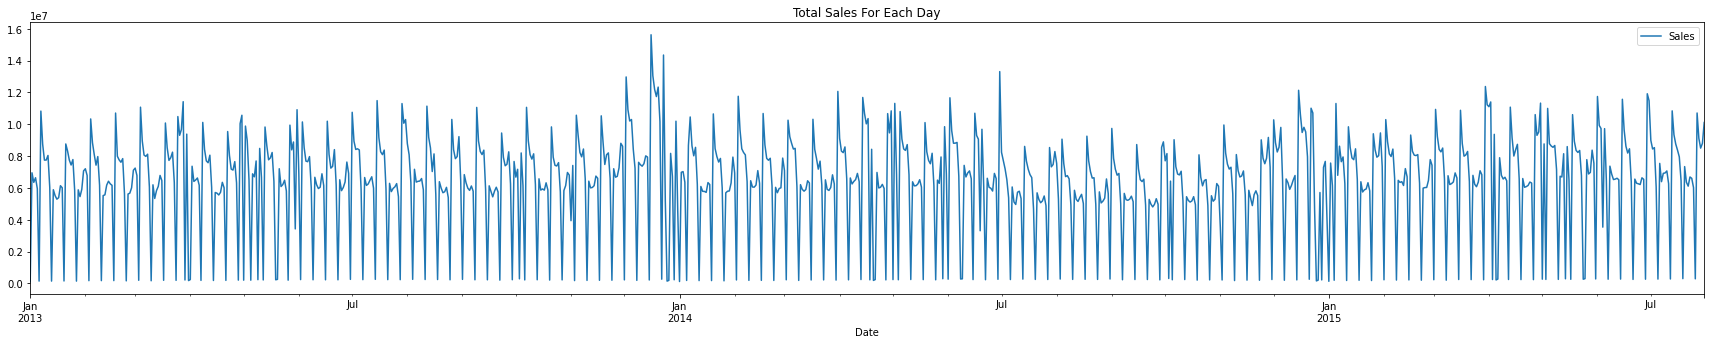

In [172]:
# Get the total sales for each day
sales_sum = sales_train_dataset.groupby(sales_train_dataset["Date"])['Sales'].sum().to_frame()
sales_sum_axis = sales_sum.plot(kind='line',title='Total Sales For Each Day')
sales_sum_axis.figure.set_size_inches(30,5)

**How does Assortment type affect sales?**

In [189]:
stores_sales = sales_train_dataset.groupby(sales_train_dataset["Store"])['Sales'].sum().to_frame()
#print(sales_train_dataset.tail())
merged_store_sales = pd.merge(store_dataset,sales_train_dataset,left_index=True, right_on='Store').reset_index()
print(merged_store_sales.groupby('Store').sum().loc[[3]])#

           index  CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                              
3      473068149           13310460.0                    11304.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
Store                                                                       
3                     1889652.0     942          13188.0        1894362.0   

       DayOfWeek    Sales  Customers  Open  Promo  SchoolHoliday  
Store                                                             
3           3766  5408261     584310   779    360            170  
